In [1]:
from matplotlib import ticker
TT = ticker.FormatStrFormatter('%.7f')
import numpy as np
%display latex

Ispitajte tok funkcije $f(x)=\dfrac{x+10}{x^2-10x+26}-2.$

In [2]:
f(x)=(x+10)/(x^2-10*x+26)-2

### **nultočke** (egzaktne vrijednosti)

In [3]:
nul = solve(f(x)==0,x)
nul

[x == -1/4*sqrt(105) + 21/4, x == 1/4*sqrt(105) + 21/4]

### **nultočke** (numeričke vrijednosti)

In [4]:
list(map(lambda x: n(x.rhs()), nul))

[2.68826230851010, 7.81173769148990]

### **derivacija**

In [5]:
der=diff(f(x),x).factor()
der

-(x^2 + 20*x - 126)/(x^2 - 10*x + 26)^2

### **stacionarne točke** (egzaktne vrijednosti)

In [6]:
stac = solve(der==0,x)
stac

[x == -sqrt(226) - 10, x == sqrt(226) - 10]

### **stacionarne točke** (numeričke vrijednosti)

In [7]:
stac_num = list(map(lambda x: n(x.rhs()), stac))
stac_num

[-25.0332963783729, 5.03329637837291]

### **druga derivacija**

In [8]:
der2 = diff(f(x),x,2)
der2.factor()

2*(x^3 + 30*x^2 - 378*x + 1000)/(x^2 - 10*x + 26)^3

**ispitivanje karaktera stacionarnih točaka pomoću druge derivacije**

In [9]:
list(map(lambda t: der2.subs(x=t), stac_num))

[0.0000368731110213056, -30.0000368731112]

**pripadne točke lokalnog minimuma i lokalnog maksimuma na grafu funkcije**

In [10]:
list(map(lambda t: (t, f(t)), stac_num))

[(-25.0332963783729, -2.01664818918645), (5.03329637837291, 13.0166481891865)]

### **točke infleksije** - treba numerički riješiti jednadžbu $f''(x)=0$ 

Na većoj domeni uočavamo sa slike dvije nultočke od $f''$

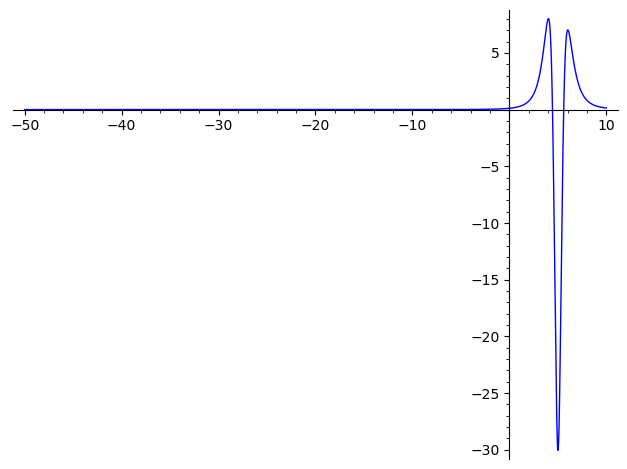

In [11]:
plot(der2,x,-50,10)

Zumiramo sliku na manji dio domene od $f''$ gdje smo uočili nultočke

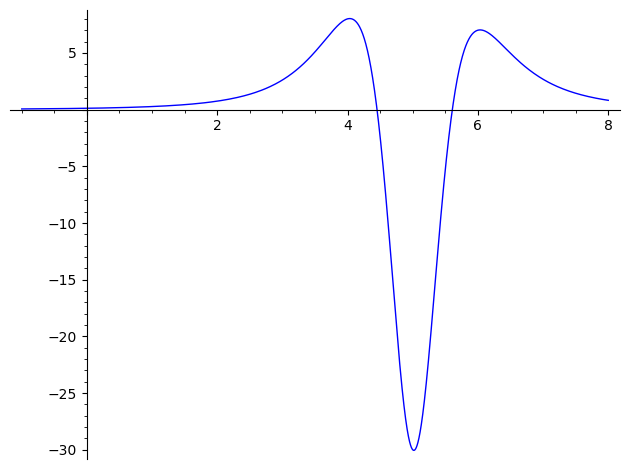

In [12]:
plot(der2,x,-1,8)

sa zumirane slike vidimo da se nultočke nalaze na intervalima $\langle4,5\rangle$ i $\langle5,6\rangle$ 

In [13]:
a1 = find_root(der2,4,5)
a1

4.451866084468802

In [14]:
a2 = find_root(der2,5,6)
a2

5.607325047828771

Međutim, $f''$ ima još jednu nultočku koju tek jasno vidimo ako zumiramo sliku na dio domene oko broja $-40$.  
Uočite kako $f''$ poprima jako male vrijednosti na segmentu $[-50,-30]$ zbog čega je bilo teško uočiti njezinu
treću nultočke sa slike koja pokriva veći dio domene. 

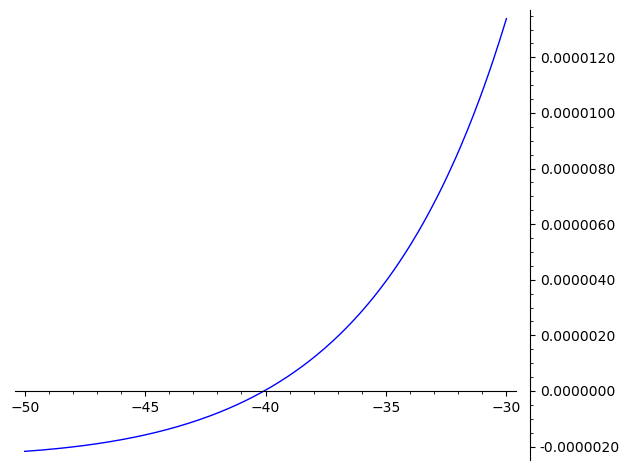

In [15]:
plot(der2,x,-50,-30,tick_formatter=[None,TT])

In [16]:
a3 = find_root(der2,-45,-35)
a3

-40.05919113229758

**točke infleksije na grafu funkcije $f$**

In [17]:
infleksije = list(map(lambda t: (t, f(t)), [a1,a2,a3]))
infleksije

[(4.451866084468802, 9.112966521117174),
 (5.607325047828771, 9.401831261957176),
 (-40.05919113229758, -2.014797783074393)]

Nultočke od $f''$ svode se na traženje nultočaka polinoma $x^3+30x^2-378x+1000$.  
Postoje numerički algoritmi koji mogu dati sve nultočke zadanog polinoma bez da moramo crtati sliku.  
Takav algoritam je implementiran u python numpy modulu.

In [18]:
np.roots([1, 30, -378, 1000])

array([-40.05919113,   5.60732505,   4.45186608])

Također, u SageMath alatu klasa koja reprezentira polinome ima metodu `roots` koja daje sve nultočke polinoma u nekom polju (u ovom slučaju nas zanimaju samo realne nultočke).

In [19]:
R.<t>=QQ[]
p = t^3 + 30*t^2 -378*t + 1000
p.roots(RR) 

[(-40.0591911322976, 1), (4.45186608446880, 1), (5.60732504782877, 1)]

**Graf funkcije $f$**

* Pazite, funkcija $f$ oko lokalnog minimuma jako sporo mijenja vrijednosti i na velikoj slici se to uopće ne primijeti, čak bismo rekli na temelju slike da lokalni minimum uopće ne postoji.
* Pazite, funkcija $f$ na segmentu $[-90,-20]$ jako sporo mijenja vrijednosti zbog čega je na većoj slici jako teško uočljiva točka infleksije $-40.059$.
* Međutim, ako sliku zumiramo oko lokalnog minimuma (manja slika), tada vidimo da lokalni minimum zaista postoji. Primijetite kako funkcija jako sporo pada i raste u okolini lokalnog minimuma.
* Također, na drugoj manjoj slici gdje crtamo funkciju $f$ na segmentu $[-90,-20]$ možemo uočiti da na tom segmentu postoji točka infleksije.
* Ovaj primjer pokazuje kako su diferencijalni račun i teorija jako bitni jer oni pokazuju da lokalni minimum zaista postoji te da zaista postoje tri točke infleksije, iako na (velikoj) slici teško možemo sve to uočiti.

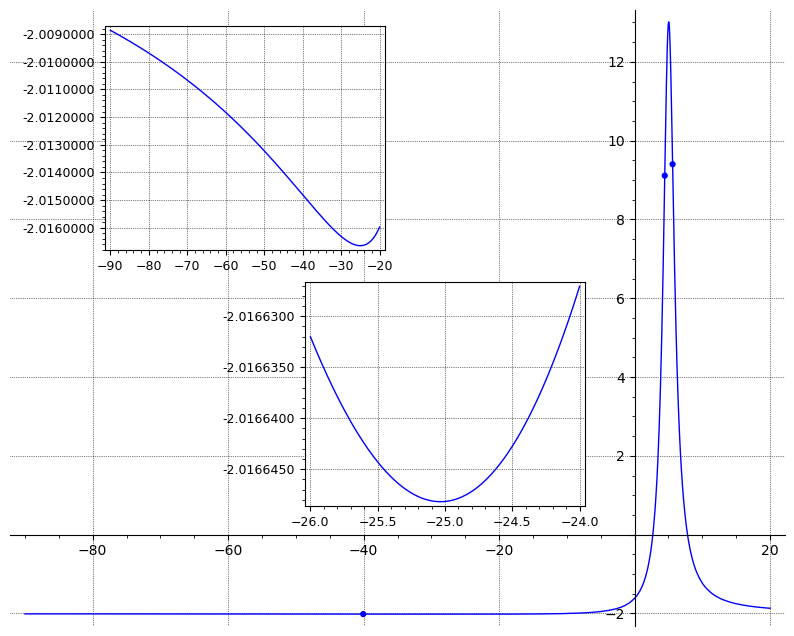

In [20]:
slika1 = plot(f(x),(x,-90,20),gridlines=True) + point(infleksije, size=20)
slika2 = plot(f(x),(x,-26,-24),gridlines=True,frame=True,tick_formatter=[None,TT],fontsize=9)
slika3 = plot(f(x),(x,-90,-20),gridlines=True,frame=True,tick_formatter=[None,TT],fontsize=9)
slika = multi_graphics([slika1, (slika2, (0.42, 0.26, 0.28, 0.28)), (slika3, (0.22, 0.58, 0.28, 0.28))])
slika.show(figsize=[10,8])

spremanje slike u tekući direktorij u *png* format željene kvalitete i dimenzija

In [21]:
slika.save("fun1.png", figsize=[10,8], dpi=300)